# Work for Project: Rachel Mende

In [2]:
import math
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from typing import Dict
import csv
from typing import NamedTuple
from scipy.spatial import distance
from collections import defaultdict
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
Vector = List[float]
pd.options.mode.chained_assignment = None 

In [3]:
original = pd.read_csv("vehicles.csv", engine = "python", encoding = "latin1")
#########
usedcars = original[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]]
#########

In [49]:
#Consider only values which are finite, aka have no NaN value
newUsedCars = usedcars.dropna()

def find_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df.drop(df[(df[column] < lower_bound)].index, inplace = True)
    df.drop(df[(df[column] > upper_bound)].index, inplace = True)
    
find_outliers_iqr(newUsedCars, 'price')
find_outliers_iqr(newUsedCars, 'odometer')
find_outliers_iqr(newUsedCars, 'year')

##Turns string to int value
le = LabelEncoder()
newUsedCars['conditionInt'] = le.fit_transform(newUsedCars['condition'])

# Bar Chart for relating the condition of a car and its price

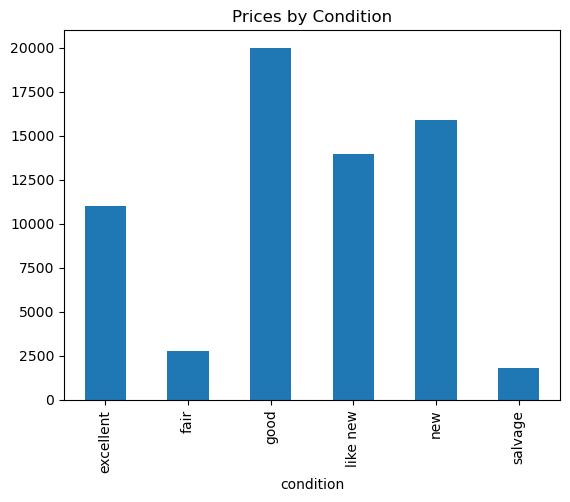

In [52]:
MeanPriceByCondition = usedcars.groupby(["condition"])["price"].median().plot(kind="bar", title="Prices by Condition")

#### As seen by this graph, the median value of a car seems to decrease as its condition gets worse, though one exception is the good category, which has a higher median price than the other categories even though its quality is not as good. This is most likely a result of most cars being listed as "good", at least compared to other variables

## Scatterplot between the inputs and the resulting price

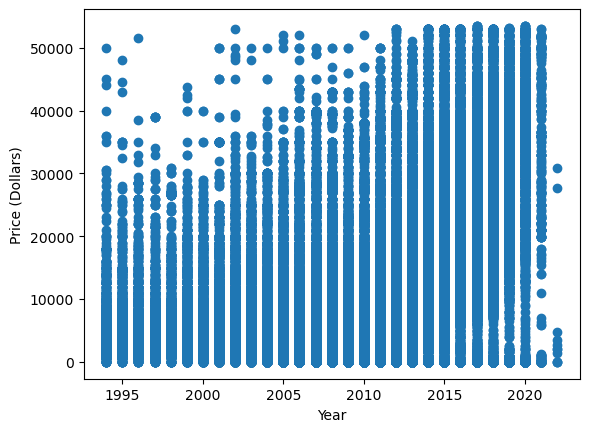

        price    year manufacturer  condition    cylinders  odometer  \
27      33590  2014.0          gmc       good  8 cylinders   57923.0   
28      22590  2010.0    chevrolet       good  8 cylinders   71229.0   
29      39590  2020.0    chevrolet       good  8 cylinders   19160.0   
30      30990  2017.0       toyota       good  8 cylinders   41124.0   
31      15000  2013.0         ford  excellent  6 cylinders  128000.0   
...       ...     ...          ...        ...          ...       ...   
426866  32990  2016.0     infiniti       good  8 cylinders   55612.0   
426868      0  2010.0       toyota  excellent  6 cylinders  155000.0   
426874  33590  2018.0        lexus       good  6 cylinders   30814.0   
426875  23590  2019.0       nissan       good  6 cylinders   32226.0   
426878  28990  2018.0        lexus       good  6 cylinders   30112.0   

       title_status transmission  conditionInt  
27            clean        other             2  
28            clean        other     

In [56]:
#Setting up a scatter plot between the year and the price
fig, ax = plt.subplots()
year = newUsedCars["year"]
price = newUsedCars["price"]
ax.scatter(year, price)
"""
# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(year) & np.isfinite(price)
m, b = np.polyfit(year[noNaN], price[noNaN], deg=1)
ax.plot(year, m * year + b, color="red")
"""
#labels
plt.xlabel("Year")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.show()
#plt.xlim(1900, 2022)
print(newUsedCars)

#### Looking at this graph, there seems to be a slightly positive relationship between the year and the price. However, there are peaks and troughs within the dataset as time goes on

## Plotting the relationship between the mileage and the price

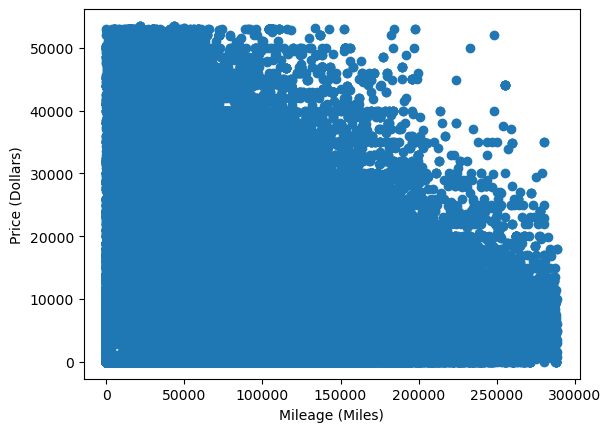

In [60]:
#Setting up a scatter plot between the mileage and the price
fig, ax = plt.subplots()
mileage = newUsedCars["odometer"]
price = newUsedCars["price"]

#plotting the line
ax.scatter(mileage, price)

# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
#noNaN = np.isfinite(mileage) & np.isfinite(price)
#m, b = np.polyfit(mileage[noNaN], price[noNaN], deg=1)
#ax.plot(mileage, m * mileage + b, color="red")

#labels
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view

plt.show()

#### Unlike the relationship between the year and the price, the relationship between the mileage of a car and its price is negative, meaning that the more a car has been driven, the lower its price becomes

## Heat Map of Correlations

In [64]:
correlations = newUsedCars[["year", "odometer", "conditionInt","price"]].corr()
correlations.style.background_gradient(cmap='coolwarm')

,year,odometer,conditionInt,price
year,1.000000,-0.624797,0.087809,0.579314
odometer,-0.624797,1.000000,-0.139690,-0.576273
conditionInt,0.087809,-0.139690,1.000000,0.173454
price,0.579314,-0.576273,0.173454,1.000000


# THIS LINE GRAPH IS COMPLETELY WRONG

               price    year       odometer
year                                       
1994.0   7685.531092  1994.0  141751.445378
1995.0   7300.901813  1995.0  144939.815710
1996.0   7143.741543  1996.0  147208.148850
1997.0   6259.493658  1997.0  156311.482030
1998.0   6419.532093  1998.0  152062.010233
1999.0   6331.131928  1999.0  154135.234940
2000.0   6072.423097  2000.0  156587.824147
2001.0   6460.247289  2001.0  154865.256047
2002.0   6457.580145  2002.0  153371.594657
2003.0   6523.108865  2003.0  151817.779679
2004.0   6630.283449  2004.0  152269.225022
2005.0   7045.131856  2005.0  149232.505635
2006.0   7670.685594  2006.0  146001.109676
2007.0   8244.303753  2007.0  142067.737129
2008.0   9105.279149  2008.0  138177.801638
2009.0   8608.437222  2009.0  132570.714335
2010.0  10141.458488  2010.0  125783.397632
2011.0  12599.057839  2011.0  119076.879838
2012.0  13755.162143  2012.0  110129.878170
2013.0  14978.366806  2013.0  100927.839533
2014.0  17431.695766  2014.0   9

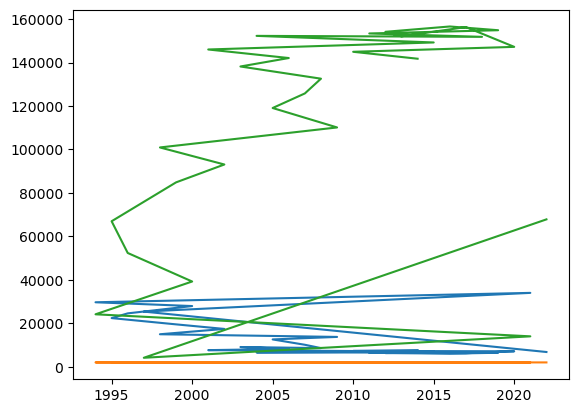

In [72]:
fig, ax = plt.subplots()
#remove NaN Values
noNaN = np.isfinite(mileage) & np.isfinite(price) * np.isfinite(year)
years = (year[noNaN]).unique()
yearmeans = usedcars.groupby(year[noNaN]).mean(numeric_only=True)
print(yearmeans)
ax.plot(years, yearmeans)
##plt.ylim(-5000, 400000)

# Box Plot for price

Text(0.5, 1.0, 'Boxplot for the price of used cars')

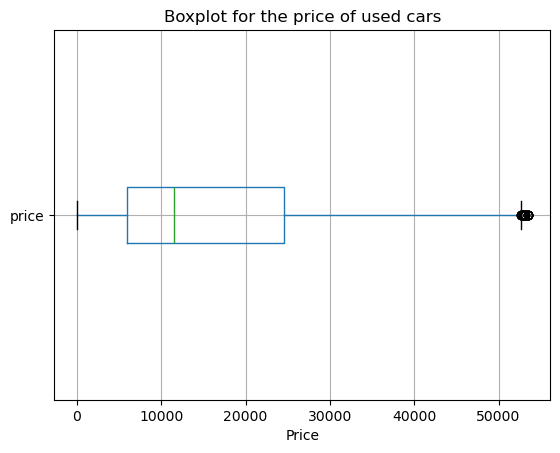

In [83]:
newUsedCars.boxplot(column=["price"], vert=False, xlabel="Price")
plt.title("Boxplot for the price of used cars")

#### As shown by the boxplot, the vast majority of the data points are located among the lower end to the left, meaning the data is tremendously skewed right. Some outliers range from a minimum of about 100,000 dollars to a maximum of around 3.8 million. Seeing as how outliers have a large effect on the mean of the price of used cars, this could be problematic for trying to accurately predict the price of used cars with our inputs

(0.0, 50000.0)

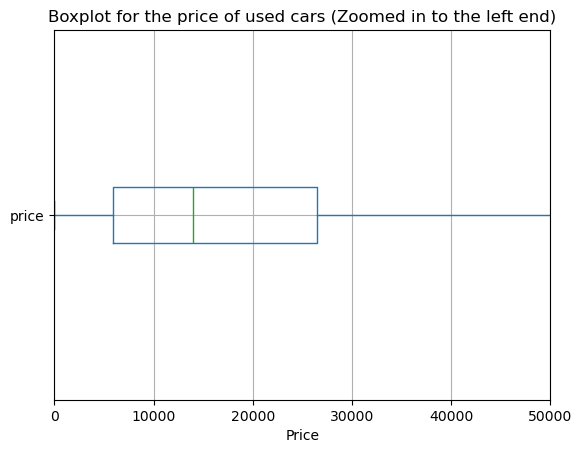

In [86]:
usedcars.boxplot(column=["price"], vert=False, xlabel="Price")
plt.title("Boxplot for the price of used cars (Zoomed in to the left end)")
plt.xlim(0, 50000)

#### Now with a zoomed in view of used car prices at the lower end, ignoring the outliers. The median price for a used car is around 14000 dollars, which is incredibly low compared to the median and maximum prices found at the right end of the boxplot, and shows how troublesome the skewness might be in trying to make our predictions

# Setup for Quadratic Regression testing (To Be Done)

In [24]:

#Remove high price outliers by finding quantiles
#outlier = usedcars["price"].quantile(0.99)
#usedcars = usedcars[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]][usedcars["price"] < outlier]

Inputs = usedcars[["year", "odometer"]][noNaN]
Price = usedcars["price"][noNaN]
trainerX, testerX, trainerY, testerY = train_test_split(Inputs, Price, test_size=0.192, random_state=27)


In [25]:
"""
PolyRegress = PolynomialFeatures(3)
polyFTrainer = PolyRegress.fit_transform(trainerX)
polyFTester = PolyRegress.fit_transform(testerX)
polyM = linear_model.LinearRegression()
polyM.fit(polyFTrainer, trainerY)
trainerYPredictions = polyM.predict(polyFTrainer)
testerYPredictions = polyM.predict(polyFTester)
# The intercept:
print('Intercept: \n', polyM.intercept_)
# The coefficients
print('Coefficients: \n', polyM.coef_)
# The mean squared error
print(f'Mean squared error: {mean_squared_error(testerYPredictions, testerY)}')
# The coefficient of determination: 1 is perfect prediction
print(f'R-Squared: {r2_score(testerYPredictions, testerY)}')
"""
print("To Be Done")

To Be Done
